### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Матюшкин Денис Владимирович
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 4

Automobile Data Set  

Название файла: imports-85.data

Ссылка: https://archive.ics.uci.edu/ml/datasets/Automobile  

Первый признак: horsepower (столбец No 22)  

Второй признак: price (столбец No 26)  

Класс: symboling (столбец No 1)

Алгоритмы: K-means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model

Меры качества: Чистота (purity), парные меры TP, FN, FP, TN, индекс Фоулкса – Мэллоуса

Найти лучший алгоритм кластеризации относительно меры качества: индекс Фоулкса – Мэллоуса

1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
                "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
                "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
                "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
                "city-mpg", "highway-mpg", "price"]

my_data = pd.read_csv(url, names=column_names)
my_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df = my_data[["horsepower", "price", "symboling"]].copy()
df.head()

,horsepower,price,symboling
0,111,13495,3
1,111,16500,3
2,154,16500,1
3,102,13950,2
4,115,17450,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   horsepower  205 non-null    object
 1   price       205 non-null    object
 2   symboling   205 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.9+ KB


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

In [6]:
df = df.replace('?', np.NaN)
df.isnull().sum()

,0
horsepower,2
price,4
symboling,0


In [7]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

,0
horsepower,0
price,0
symboling,0


In [8]:
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  205 non-null    float64
 1   price       205 non-null    float64
 2   symboling   205 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.9 KB


In [9]:
df.head()

,horsepower,price,symboling
0,111.0,13495.0,3
1,111.0,16500.0,3
2,154.0,16500.0,1
3,102.0,13950.0,2
4,115.0,17450.0,2


3. Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало пяти.

In [10]:
class_counts = df["symboling"].value_counts()
class_counts

,count
symboling,
0,67
1,54
2,32
3,27
-1,22
-2,3


In [11]:
len(class_counts)

6

In [12]:
df["symboling"] = df["symboling"].apply(lambda x: x if x in class_counts.index[:4] else -1)
df["symboling"].value_counts()

,count
symboling,
0,67
1,54
2,32
3,27
-1,25


4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

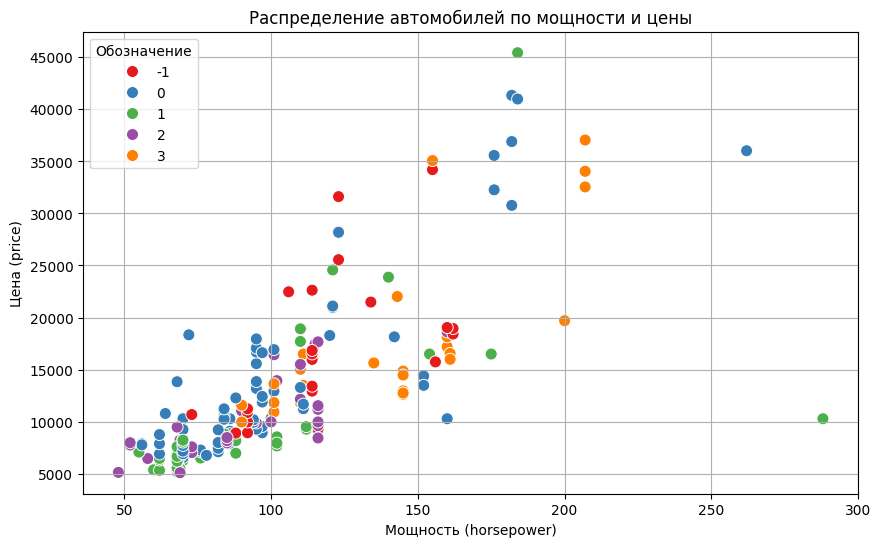

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="horsepower", y="price", hue="symboling", palette="Set1", s=75)

plt.title("Распределение автомобилей по мощности и цены")
plt.xlabel("Мощность (horsepower)")
plt.ylabel("Цена (price)")
plt.legend(title="Обозначение")
plt.grid(True)
plt.show()

5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

In [14]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [15]:
def plot_cluster(X, y):
    # Визуализация кластеров
    plt.figure(figsize=(10, 6))
    clusters = np.unique(y)
    for cluster in clusters:
        # Индексы строк для данного кластера
        row_ix = np.where(y == cluster)[0]
        # Диаграмма рассеяния для кластера, используем iloc для индексации строк
        plt.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], s=100, label=f"Cluster {cluster}")

    plt.title("Распределение кластеров")
    plt.xlabel("Horsepower")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)

In [16]:
X = df.iloc[:, [0, 1]]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

n_clusters = len(df["symboling"].value_counts())
n_clusters

5

1. K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


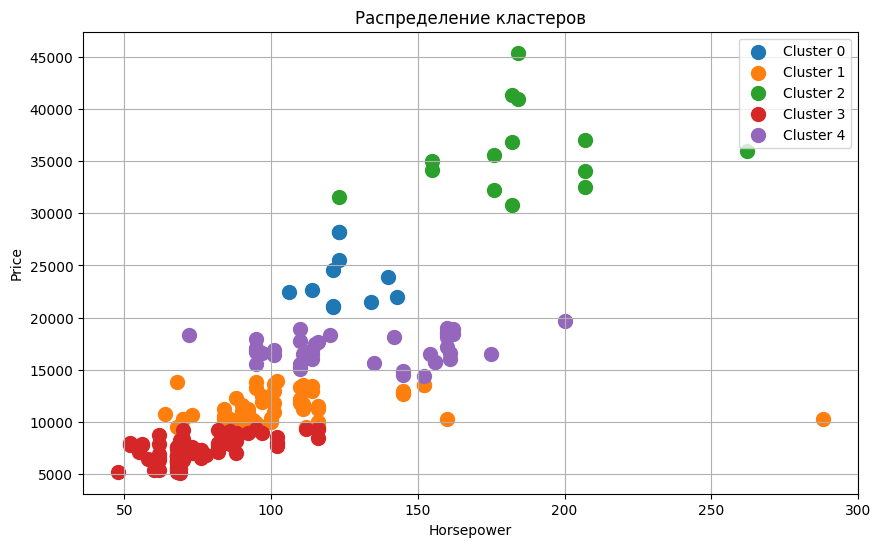

In [17]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)
kmeans_labels = kmeans.predict(X)

plot_cluster(X, kmeans_labels)

2. Agglomerative Clustering

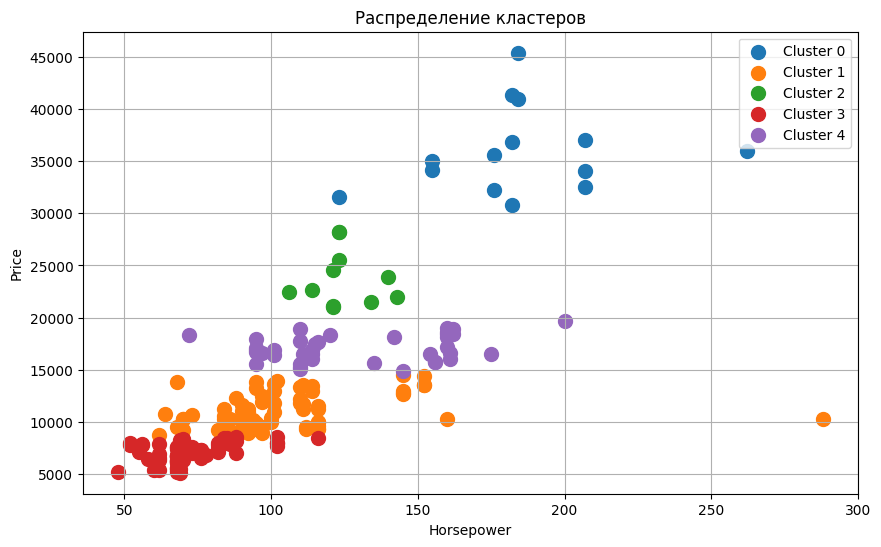

In [18]:
agglo = AgglomerativeClustering(n_clusters=n_clusters)
agglo_labels = agglo.fit_predict(X)

plot_cluster(X, agglo_labels)

3. DBSCAN

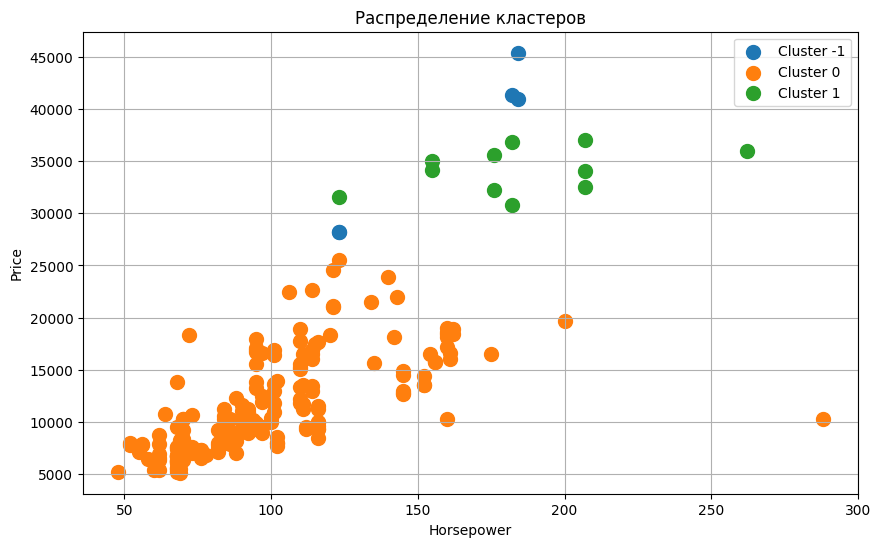

In [19]:
dbscan = DBSCAN(eps=2000, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plot_cluster(X, dbscan_labels)

4. Gaussian Mixture Model

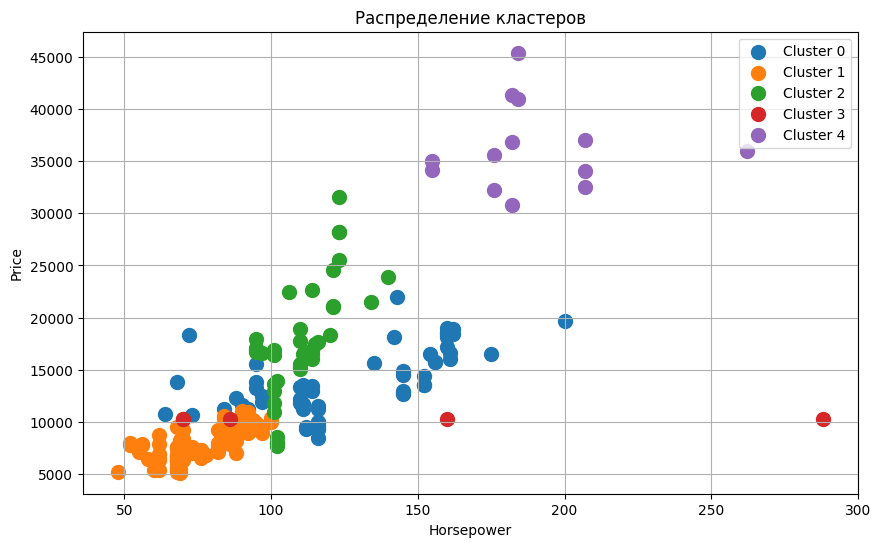

In [20]:
gmm = GaussianMixture(n_components=n_clusters, random_state=0)
gmm_labels = gmm.fit_predict(X)

plot_cluster(X, gmm_labels)

6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании, на основании данных в матрице сопряженности, не используя другие функции из scikit-learn или других фреймворков.  

In [21]:
from sklearn.metrics.cluster import contingency_matrix

Функция для рассчета чистоты кластеризации на основе матрицы сопряженности.

In [22]:
def purity_score(true_labels, cluster_labels):
    contingency = contingency_matrix(true_labels, cluster_labels)
    return np.sum(np.amax(contingency, axis=0)) / np.sum(contingency)

Функцию рассчета TP, FP, FN и TN на основании матрицы сопряженности:
1. TP: пары в одном классе и в одном кластере
2. FP: пары в одном кластере, но в разных классах
3. FN: пары в одном классе, но в разных кластерах
4. TN: пары в разных классах и в разных кластерах

In [23]:
def calculate_pairwise_measures(true_labels, cluster_labels):
    contingency = contingency_matrix(true_labels, cluster_labels)
    n = np.sum(contingency)

    TP = np.sum([np.sum(cont * (cont - 1)) / 2 for cont in contingency])
    cluster_sums = np.sum(contingency, axis=0)
    FP = np.sum(cluster_sums * (cluster_sums - 1)) / 2 - TP
    class_sums = np.sum(contingency, axis=1)
    FN = np.sum(class_sums * (class_sums - 1)) / 2 - TP
    TN = (n * (n - 1)) / 2 - TP - FP - FN

    return TP, FP, FN, TN

Индекс Фоулкса-Мэллоуса (Fowlkes-Mallows index, FM) — это метрика, которая оценивает точность и полноту кластеризации.

Индекс FM определяется как:

$$ FM = \frac{TP}{\sqrt{(TP + FP)(TP + FN)}} $$


In [24]:
def fowlkes_mallows_index(TP, FP, FN):
    return TP / np.sqrt((TP + FP) * (TP + FN))

In [25]:
true_labels = df["symboling"].values

print("K-Means")
purity_kmeans = purity_score(true_labels, kmeans_labels)
print(f"Чистота (Purity): {purity_kmeans:.4f}")
TP, FP, FN, TN = calculate_pairwise_measures(true_labels, kmeans_labels)
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
fm_kmeans = fowlkes_mallows_index(TP, FP, FN)
print(f"Индекс Фоулкса-Мэллоуса: {fm_kmeans:.4f}\n")

K-Means
Чистота (Purity): 0.4146
TP: 1776.0, FP: 4269.0, FN: 3013.0, TN: 11852.0
Индекс Фоулкса-Мэллоуса: 0.3301



In [26]:
print("Agglomerative Clustering")
purity_agglo = purity_score(true_labels, agglo_labels)
print(f"Чистота (Purity): {purity_agglo:.4f}")
TP, FP, FN, TN = calculate_pairwise_measures(true_labels, agglo_labels)
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
fm_agglo = fowlkes_mallows_index(TP, FP, FN)
print(f"Индекс Фоулкса-Мэллоуса: {fm_agglo:.4f}\n")

Agglomerative Clustering
Чистота (Purity): 0.4341
TP: 1742.0, FP: 4081.0, FN: 3047.0, TN: 12040.0
Индекс Фоулкса-Мэллоуса: 0.3299



In [27]:
print("DBSCAN")
purity_dbscan = purity_score(true_labels, dbscan_labels)
print(f"Чистота (Purity): {purity_dbscan:.4f}")
TP, FP, FN, TN = calculate_pairwise_measures(true_labels, dbscan_labels)
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
fm_dbscan = fowlkes_mallows_index(TP, FP, FN)
print(f"Индекс Фоулкса-Мэллоуса: {fm_dbscan:.4f}\n")

DBSCAN
Чистота (Purity): 0.3268
TP: 4089.0, FP: 13742.0, FN: 700.0, TN: 2379.0
Индекс Фоулкса-Мэллоуса: 0.4425



In [28]:
print("Gaussian Mixture Model")
purity_gmm = purity_score(true_labels, gmm_labels)
print(f"Чистота (Purity): {purity_gmm:.4f}")
TP, FP, FN, TN = calculate_pairwise_measures(true_labels, gmm_labels)
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
fm_gmm = fowlkes_mallows_index(TP, FP, FN)
print(f"Индекс Фоулкса-Мэллоуса: {fm_gmm:.4f}\n")

Gaussian Mixture Model
Чистота (Purity): 0.3659
TP: 1766.0, FP: 4789.0, FN: 3023.0, TN: 11332.0
Индекс Фоулкса-Мэллоуса: 0.3152



7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

1. **K-Means**: 0.3301
2. **Agglomerative Clustering**: 0.3299
3. **DBSCAN**: 0.4425
4. **Gaussian Mixture Model (GMM)**: 0.3152

По индексу Фоулкса-Мэллоуса самый лучший алгоритм - DBSCAN, т.к. наша база данных сильно отличается от нормальной кластеризованной.

8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

При попытке нарисовать DBSCAN не хватает ОЗУ, поэтому нарисовал k-means.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


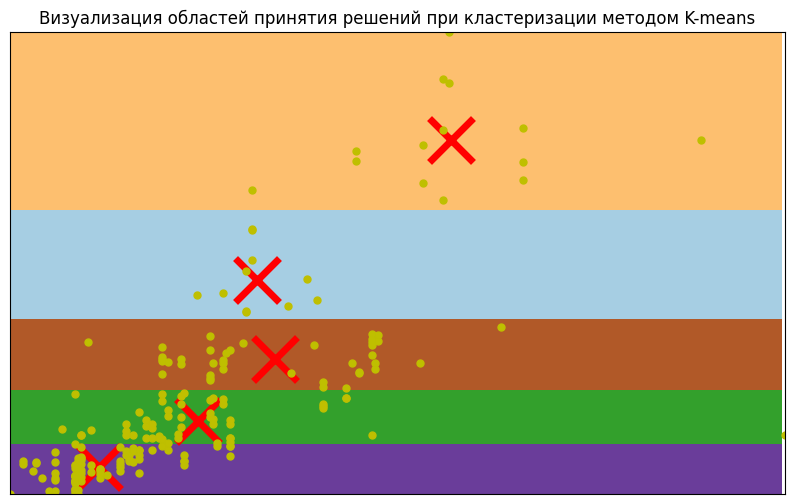

In [34]:
X_np = X.to_numpy()
h = 1

x_min, x_max = X_np[:, 0].min(), X_np[:, 0].max()
y_min, y_max = X_np[:, 1].min(), X_np[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Z = dbscan.fit_predict(np.c_[xx.ravel(), yy.ravel()])
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(X_np[:, 0], X_np[:, 1], "yo", markersize=5)
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="x",
    s=1000,
    lw=5,
    color="r",
)
plt.title("Визуализация областей принятия решений при кластеризации методом K-means")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());